<a href="https://colab.research.google.com/github/aarav911/Brain_Tumor_Segmentation_BCP/blob/main/tensorflow_keras_basics_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow/Keras Basics Notebook
### *Build your first neural networks & CNNs*

## Importing Required Libraries

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Build a Simple Neural Network

In [10]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10,)),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Train Model on Random Data
(Demo purpose only)

In [11]:
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5289 - loss: 0.6912   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5023 - loss: 0.6957
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5574 - loss: 0.6827
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5321 - loss: 0.6906
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 0.6892 


## Build a Simple CNN

In [12]:
cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

## Train CNN on Dummy Images

In [20]:
X = np.random.rand(200, 64, 64, 1)
y = np.random.randint(0, 2, 200)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X, y, epochs=3)

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.5749 - loss: 0.6883
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.5621 - loss: 0.6957
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.5102 - loss: 0.6958


## Build a U-Net Block (Foundation for Segmentation Models)

1.   List item
2.   List item



In [14]:
def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

inp = layers.Input((128,128,1))
out = conv_block(inp, 16)
unet_demo = models.Model(inp, out)
unet_demo.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │         2,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,480 (9.69 KB)

 Trainable params: 2,480 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

## **Exercises**
1. Modify the CNN to include **Dropout**.
2. Add more convolution layers to increase accuracy.
3. Build the **encoder part** of U-Net using conv_block.
4. Train CNN on a real dataset (MNIST or CIFAR10).
5. Plot training curves (loss & accuracy) using matplotlib.


In [15]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,221 (129.77 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,148 (86.52 KB)

In [21]:
cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(64,64,1)),
    layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,889 (296.44 KB)

 Trainable params: 75,889 (296.44 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
X = np.random.rand(200, 64, 64, 1)
Y = np.random.randint(0, 2, 200)
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(X, Y, epochs = 3)
# the accuracy decreased... Hypothesis: This is because the data is purely random.

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4817 - loss: 8.3548
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4809 - loss: 8.3673
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4721 - loss: 8.5080


In [39]:
#hmm, still a similar accuracy. Maybe an stronger cnn is ironically not good for such small data.
#or maybe dropout is hurting the learning here?
#lets drop dropout, and make it simpler for the small synthetic data.
cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64,64,1)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1)
])

In [28]:
cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │        15,377 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,537 (60.69 KB)

 Trainable params: 15,537 (60.69 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
X = np.random.rand(200,64,64,1)

Y = (X[:,10,10,0] > 0.5).astype(int)

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(X,Y, epochs = 20, batch_size=16)
#ok, the accuracy is going up for this simple relationship. Basically, look at one specific pixel for every image, and if its greater than 0.5 then 1, else 0

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5339 - loss: 0.8046
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6067 - loss: 0.6790
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6940 - loss: 0.5956
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7378 - loss: 0.5366
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8145 - loss: 0.4788
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8837 - loss: 0.4157
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8755 - loss: 0.3622
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9640 - loss: 0.3404
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9866 - loss: 0.2946
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9641 - loss: 0.2840
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9985 - loss: 0.2281
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy:

In [35]:
#Lets try to see if we can use the better cnn for the random relation case...
cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(64,64,1)),
    layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [41]:
X = np.random.rand(200, 64, 64, 1)
Y = np.random.randint(0, 2, 200)
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(X, Y, epochs = 20, batch_size=16)
#nope it doesnt work

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5093 - loss: 7.9099
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5243 - loss: 7.6673
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4995 - loss: 8.0667
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5212 - loss: 7.7181
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5330 - loss: 7.5265
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5335 - loss: 7.5196
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5373 - loss: 7.4586
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4858 - loss: 8.2883
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4853 - loss: 8.2961
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5394 - loss: 7.4247
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5157 - loss: 7.8056
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy:

In [43]:
X = np.random.rand(500, 64, 64, 1)
Y = np.random.randint(0, 2, 500)
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(X, Y, epochs = 20, batch_size=16)
#how about more images. Nope... doesnt work.

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4618 - loss: 8.6740
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4505 - loss: 8.8563
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4628 - loss: 8.6593
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4757 - loss: 8.4511
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4966 - loss: 8.1145
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4673 - loss: 8.5868
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4682 - loss: 8.5718
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4739 - loss: 8.4804
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4655 - loss: 8.6150
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4735 - loss: 8.4858
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5100 - loss: 7.8986
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy:

In [48]:
#Well anyways for truly random X, Y, the accuracy should be around 0.5. Lets move on to using the real data. Lets do MNIST First
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to CNN format
X_train = X_train.reshape(-1,28,28,1) / 255.0
X_test  = X_test.reshape(-1,28,28,1) / 255.0


cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = cnn.fit(X_train, y_train, epochs=5, validation_split=0.2)
cnn.evaluate(X_test, y_test)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 316s 209ms/step - accuracy: 0.8899 - loss: 0.3246 - val_accuracy: 0.9874 - val_loss: 0.0410
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 309s 206ms/step - accuracy: 0.9847 - loss: 0.0479 - val_accuracy: 0.9861 - val_loss: 0.0481
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 322s 206ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9837 - val_loss: 0.0564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 322s 206ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9898 - val_loss: 0.0336
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 321s 206ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9913 - val_loss: 0.0306
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.9876 - loss: 0.0391


[0.029183758422732353, 0.9905999898910522]

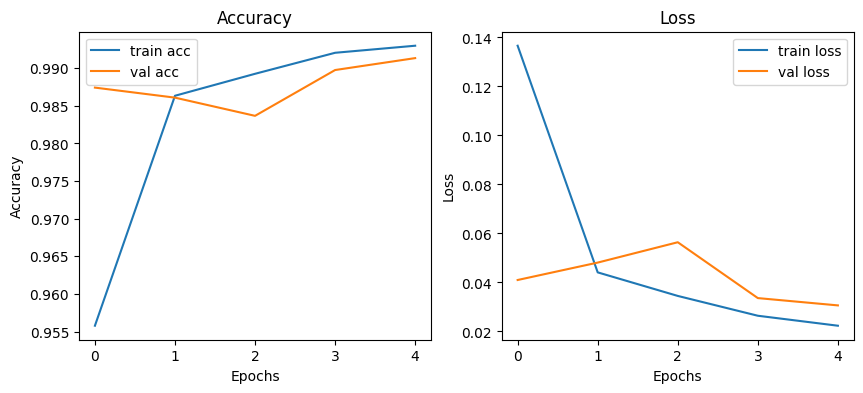

In [49]:
plt.figure(figsize=(10,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()
#thus, my cnn works on mnist.

In [ ]:
def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

inp = layers.Input((128,128,1))

c1 = conv_block(inp, 16)
p1 = layers.MaxPooling2D()(c1)

c2 = conv_block(p1, 32)
p2 = layers.MaxPooling2D()(c2)

c3 = conv_block(p2, 64)
p3 = layers.MaxPooling2D()(c3)

c4 = conv_block(p3, 128)   # deepest encoder level
p4 = layers.MaxPooling2D()(c4)

b = conv_block(p4, 256)

u1 = layers.UpSampling2D()(b)
u1 = layers.Concatenate()([u1, c4])
c5 = conv_block(u1, 128)

u2 = layers.UpSampling2D()(c5)
u2 = layers.Concatenate()([u2, c3])
c6 = conv_block(u2, 64)

u3 = layers.UpSampling2D()(c6)
u3 = layers.Concatenate()([u3, c2])
c7 = conv_block(u3, 32)

u4 = layers.UpSampling2D()(c7)
u4 = layers.Concatenate()([u4, c1])
c8 = conv_block(u4, 16)

out = layers.Conv2D(1, (1,1), activation='sigmoid')(c8)

unet = models.Model(inp, out)
unet.summary()

import tensorflow as tf

#apparently this loss function is better.
def dice_loss(y_true, y_pred, smooth=1):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)

    dice = (2. * intersection + smooth) / (union + smooth)
    return 1 - dice

unet.compile(
    optimizer='adam',
    loss=dice_loss,
    metrics=['accuracy']
)

#As per what i learnt, this is what a U-Net should look like.